**Problema 7.8.3** En 1929, Edwin Hubble examinó los datos que relacionan la velocidad radial v de 24 nebulosas galácticas con su distancia r de nuestra galaxia . Aunque hubo una dispersión considerable en los datos, los ajustó con una línea recta:

\begin{equation}
v=Hr
\end{equation}

donde H  la constante de Hubble.

a) Grafique los datos para verificar la idoneidad de una relación lineal:

\begin{equation}
v (r) ≃ a + Hr
\end{equation}

In [2]:
from numpy import loadtxt, log, sqrt
import matplotlib.pyplot as plt
from matplotlib.pyplot import legend

In [3]:
data = loadtxt('dataHubble.txt')

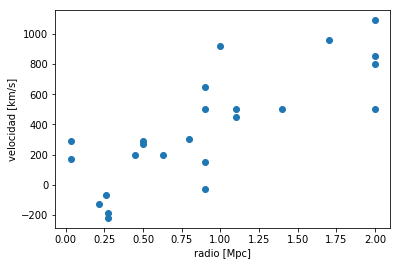

In [4]:
plt.plot(data[:,0], data[:,1], 'o')
plt.xlabel('radio [Mpc]')
plt.ylabel('velocidad [km/s]')
plt.show()

 Debido a que los datos son muy dispersos no parece muy adecuado realizar una regreción lineal.
 
b) Ya que no recibe los errores para cada medición, puede suponer que la cifra menos significativa se ha redondeado y, por lo tanto, σ ≥ 1. O puede suponer que las mediciones astronómicas son difíciles de realizar y que hay al menos 10 % de errores en los datos.

c) Calcule un ajuste de línea recta por mínimos cuadrados a estos datos.

In [66]:
def Mincu(dat):
    n = len(dat[:,0])
    err = sqrt(n)
    
    s = 0
    sx = 0
    sy = 0
    sxx = 0
    sxy = 0
    delta = 0

    for i in range(n):
        s += 1/(err*err)
        sx += dat[i,0]
        sy += (dat[i,1])
        sxx += (dat[i,0]*dat[i,0] )   
        sxy += (dat[i,0]*(dat[i,1]) )
     
    
    sx /= (err*err)
    sy /= (err*err)
    sxx /= (err*err)
    sxy /= (err*err)

    delta = s*sxx - (sx*sx)
    
    vb=sxx/delta #varianza del intercepto
    va=s/delta   #varianza de la pendiente

    b = (sxx*sy - sx*sxy) / delta  #intercepto
    m = (s*sxy - sx*sy) / delta    #pendiente
    
    return m,b,va,vb

In [67]:
m,b,vm,vn=Mincu(data)

print("H=",m,"[km/s/mps]")
print("b=",b)

Y = [(m*i+n) for i in data[:,0]]


H= 454.15844092262836 [km/s/mps]
b= -40.783649095860476


d) Trace su mejor a + Hr en la curva con los datos.

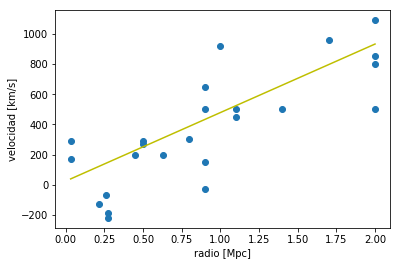

In [68]:
plt.plot(data[:,0], data[:,1], 'o', label="V(r)")
plt.plot(data[:,0], Y, 'y-', label="ajuste")
plt.xlabel('radio [Mpc]')
plt.ylabel('velocidad [km/s]')
plt.show()

e) Después de ajustar los datos, calcule la varianza y compárela con la desviación de su ajuste de los datos.
Verifique que aproximadamente un tercio de los puntos pierdan la banda de error σ (eso es lo que se espera para una distribución normal de errores).

In [69]:
n=len(data[:,1])
v=0
for i in range (n): 
    v +=((data[i,1]-Y[i])**2)
v=v/(n-1)
print("varianza=",v)

varianza= 56268.19455810235


f) Use su varianza calculada para determinar el χ2 del ajuste. Comenta sobre el valor obtenido

\begin{equation}
\chi ^{2}=\sum_{i=1}^{N}\left ( \frac{y_{i}-g(x_{i};\left \{a_{m}  \right \})}{\sigma_{i} } \right )^{2}
\end{equation}

In [71]:
chi=0
for i in range (n): 
    chi +=(((data[i,1]-Y[i]))/v)**2

print("X^2=",chi)

X^2= 0.00040875667294159



g) Determine las varianzas σm y σb y verifique si tiene sentido usarlas como errores en los valores deducidos para a y b.

\begin{equation}
\sigma_{b} ^{2}=\frac{S_{xx}}{\Delta} 
\end{equation}

\begin{equation}
\sigma_{b} ^{2}=\frac{S_{xx}}{\Delta} 
\end{equation}

In [88]:
print("varianza de m=", vm )
print("varianza de n=", vn )


varianza de m= 2.504359248142834
varianza de n= 3.0801317872097638
